# EDA DataCleaning 

The output from this 01 step is to have a clean data set for feature engineering. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


---
# Data Preparation

In [2]:
df = pd.read_csv('../data/train.csv')

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19532\3253700651.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train.csv')


In [3]:
df.shape

(150634, 78)

check for null, display the columns that has null value detected. Outcome: 7 columns with null value detected.

In [4]:
df.loc[:, df.isnull().any()] 

,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km
0,1094.090418,NaN,NaN,7.0,1.0,3.0,13.0
1,866.941448,NaN,1.0,3.0,NaN,1.0,7.0
2,1459.579948,NaN,NaN,4.0,NaN,NaN,1.0
3,950.175199,NaN,1.0,4.0,NaN,1.0,9.0
4,729.771895,NaN,1.0,2.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
150629,585.138715,NaN,4.0,6.0,NaN,1.0,3.0
150630,250.084466,1.0,1.0,4.0,NaN,NaN,1.0
150631,1790.053482,NaN,NaN,2.0,NaN,NaN,4.0
150632,587.244922,NaN,3.0,3.0,1.0,5.0,8.0


check column data types - for int64 and float

In [5]:
df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float')]

id                             int64
floor_area_sqm               float64
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
mid_storey                     int64
lower                          int64
upper                          int64
mid                            int64
floor_area_sqft              float64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
total_dwelling_units           int64
1room_sold                     int64
2room_sold                     int64
3room_sold                     int64
4room_sold                     int64
5room_sold                     int64
exec_sold                      int64
multigen_sold                  int64
studio_apartment_sold          int64
1room_rental                   int64
2room_rental                   int64
3room_rental                   int64
o

check column data types - for any other than int64 and float

In [6]:
df.dtypes[(df.dtypes!='int64') & (df.dtypes!='float')]


Tranc_YearMonth        object
town                   object
flat_type              object
block                  object
street_name            object
storey_range           object
flat_model             object
full_flat_type         object
address                object
residential            object
commercial             object
market_hawker          object
multistorey_carpark    object
precinct_pavilion      object
postal                 object
planning_area          object
mrt_name               object
bus_stop_name          object
pri_sch_name           object
sec_sch_name           object
dtype: object

---
# Backlog cleaning :
1. mall_nearest_distance has 829 rows blank. The missing value rows are at random (e.g. not to a particular flat type, location, etc), therefore it is considered Missing Completely at Random (MCAR). 829 rows are 0.55% of the total training records, therefore these records will be dropped.   
2. Mall_Within_500m, Mall_Within_1km, Mall_Within_2km , Hawker_Within_500m, Hawker_Within_1km and Hawker_Within_2km has many rows with blank data. Blank data will be filled with vale '0'
3. Redundant data columns will be dropped to keep the dataframe smaller and neat for processing and modeling. Redundant data columns generally refer to columns not required for modeling and prediction. 

In [7]:
df.dropna(subset=['Mall_Nearest_Distance'], inplace = True)

Fill up value 0 for columns with blank data in rows

In [8]:
df['Mall_Within_500m'] = df['Mall_Within_500m'].fillna(0)
df['Mall_Within_1km'] = df['Mall_Within_1km'].fillna(0)
df['Mall_Within_2km'] = df['Mall_Within_2km'].fillna(0)
df['Hawker_Within_500m'] = df['Hawker_Within_500m'].fillna(0)
df['Hawker_Within_1km'] = df['Hawker_Within_1km'].fillna(0)
df['Hawker_Within_2km'] = df['Hawker_Within_2km'].fillna(0)

Drop the columns that are not in used (e.g. longtitude and latitude information, and detail address)

In [9]:
dropped_columns = [
    'address',
    'postal',
    'Latitude',
    'Longitude',
    'mrt_latitude',
    'mrt_longitude',
    'bus_stop_latitude',
    'bus_stop_longitude',
    'pri_sch_latitude',
    'pri_sch_longitude',
    'sec_sch_latitude',	
    'sec_sch_longitude'
]

df_dropped = df.drop(columns= dropped_columns)

---

# EDA

In [10]:
df_num  = df_dropped.select_dtypes(include = 'number')


In [34]:
corr_matrix


,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,...,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
floor_area_sqm,1.000000,0.289155,0.656776,0.023413,0.003574,0.026205,-0.289155,0.076943,0.294782,-0.434607,...,0.053588,0.054047,0.076527,0.007393,-0.113401,-0.029014,-0.042130,-0.062676,-0.077970,-0.084016
lease_commence_date,0.289155,1.000000,0.348430,0.191848,0.003041,0.262219,-1.000000,0.457055,0.988677,-0.159953,...,0.152190,0.240086,0.258672,-0.037597,-0.186620,0.162868,-0.121609,-0.077871,-0.062817,-0.091913
resale_price,0.656776,0.348430,1.000000,-0.024679,-0.005685,0.351795,-0.348430,0.495537,0.351797,-0.144782,...,-0.127939,0.003277,0.065773,0.030546,-0.010871,-0.017042,0.031328,0.094886,0.036112,-0.000645
Tranc_Year,0.023413,0.191848,-0.024679,1.000000,-0.081439,0.069927,-0.191848,0.103426,0.194943,0.002997,...,0.054030,0.051077,0.061884,0.001984,0.004681,0.016523,-0.008607,0.009885,0.016232,0.001027
Tranc_Month,0.003574,0.003041,-0.005685,-0.081439,1.000000,-0.001993,-0.003041,-0.002053,0.003233,0.001825,...,-0.001779,0.000456,0.001540,-0.000322,-0.002146,0.004457,-0.003375,-0.003635,-0.002777,-0.001956
mid_storey,0.026205,0.262219,0.351795,0.069927,-0.001993,1.000000,-0.262219,0.553702,0.265458,0.212582,...,0.028718,0.020206,0.073690,0.008423,0.015071,0.079639,-0.017006,0.063702,0.051418,0.011350
hdb_age,-0.289155,-1.000000,-0.348430,-0.191848,-0.003041,-0.262219,1.000000,-0.457055,-0.988677,0.159953,...,-0.152190,-0.240086,-0.258672,0.037597,0.186620,-0.162868,0.121609,0.077871,0.062817,0.091913
max_floor_lvl,0.076943,0.457055,0.495537,0.103426,-0.002053,0.553702,-0.457055,1.000000,0.463421,0.373660,...,0.033345,0.020909,0.114101,0.015295,0.029994,0.122870,-0.013237,0.120869,0.092865,0.021817
year_completed,0.294782,0.988677,0.351797,0.194943,0.003233,0.265458,-0.988677,0.463421,1.000000,-0.151594,...,0.157683,0.250522,0.257503,-0.039866,-0.193206,0.157883,-0.121529,-0.079747,-0.056379,-0.097488
total_dwelling_units,-0.434607,-0.159953,-0.144782,0.002997,0.001825,0.212582,0.159953,0.373660,-0.151594,1.000000,...,-0.073554,-0.091824,-0.065884,0.029312,0.141780,0.060098,0.023515,0.078117,0.102475,0.119580


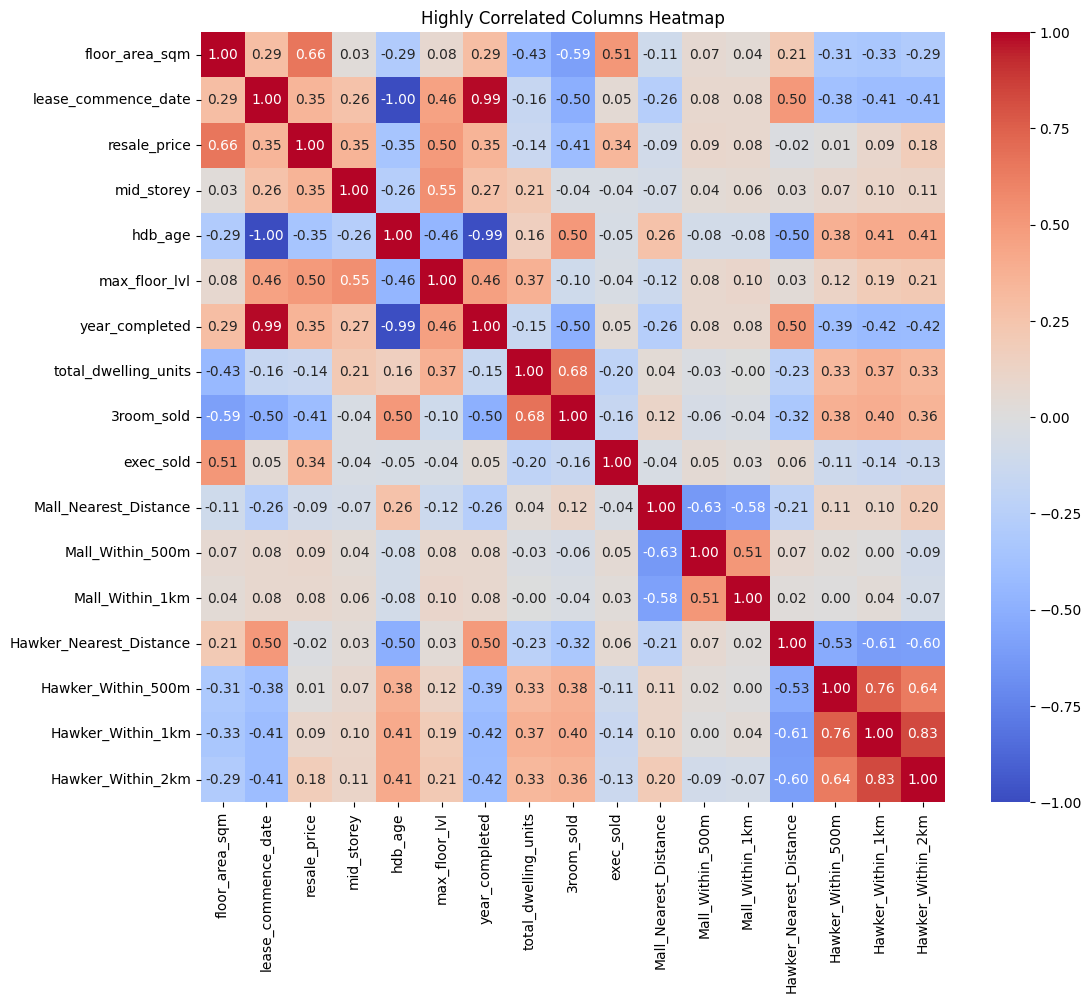

In [41]:


# note - 'id','mid','lower','upper','price_per_sqft' are not required for heatmap
df_num  = df_dropped.select_dtypes(include = 'number').drop(columns=['id','mid','lower','upper','price_per_sqft','floor_area_sqft'])

# Calculate correlation matrix
corr_matrix = df_num.corr()
# Filter out correlations with absolute value less than 0.5
high_corr_columns = corr_matrix[abs(corr_matrix) > 0.5]
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Highly Correlated Columns Heatmap')
plt.show()



> Observation: `resale price` has moderate positive correlation with `floor_area_sqm` and `max_floor_area`, has weak positive correlation with and `lease_commence_date`, `mid_storey`, `year_completed`, `exec_sold`, as well as weak negative correlation with `hdb_age` and `3room_sold`. 

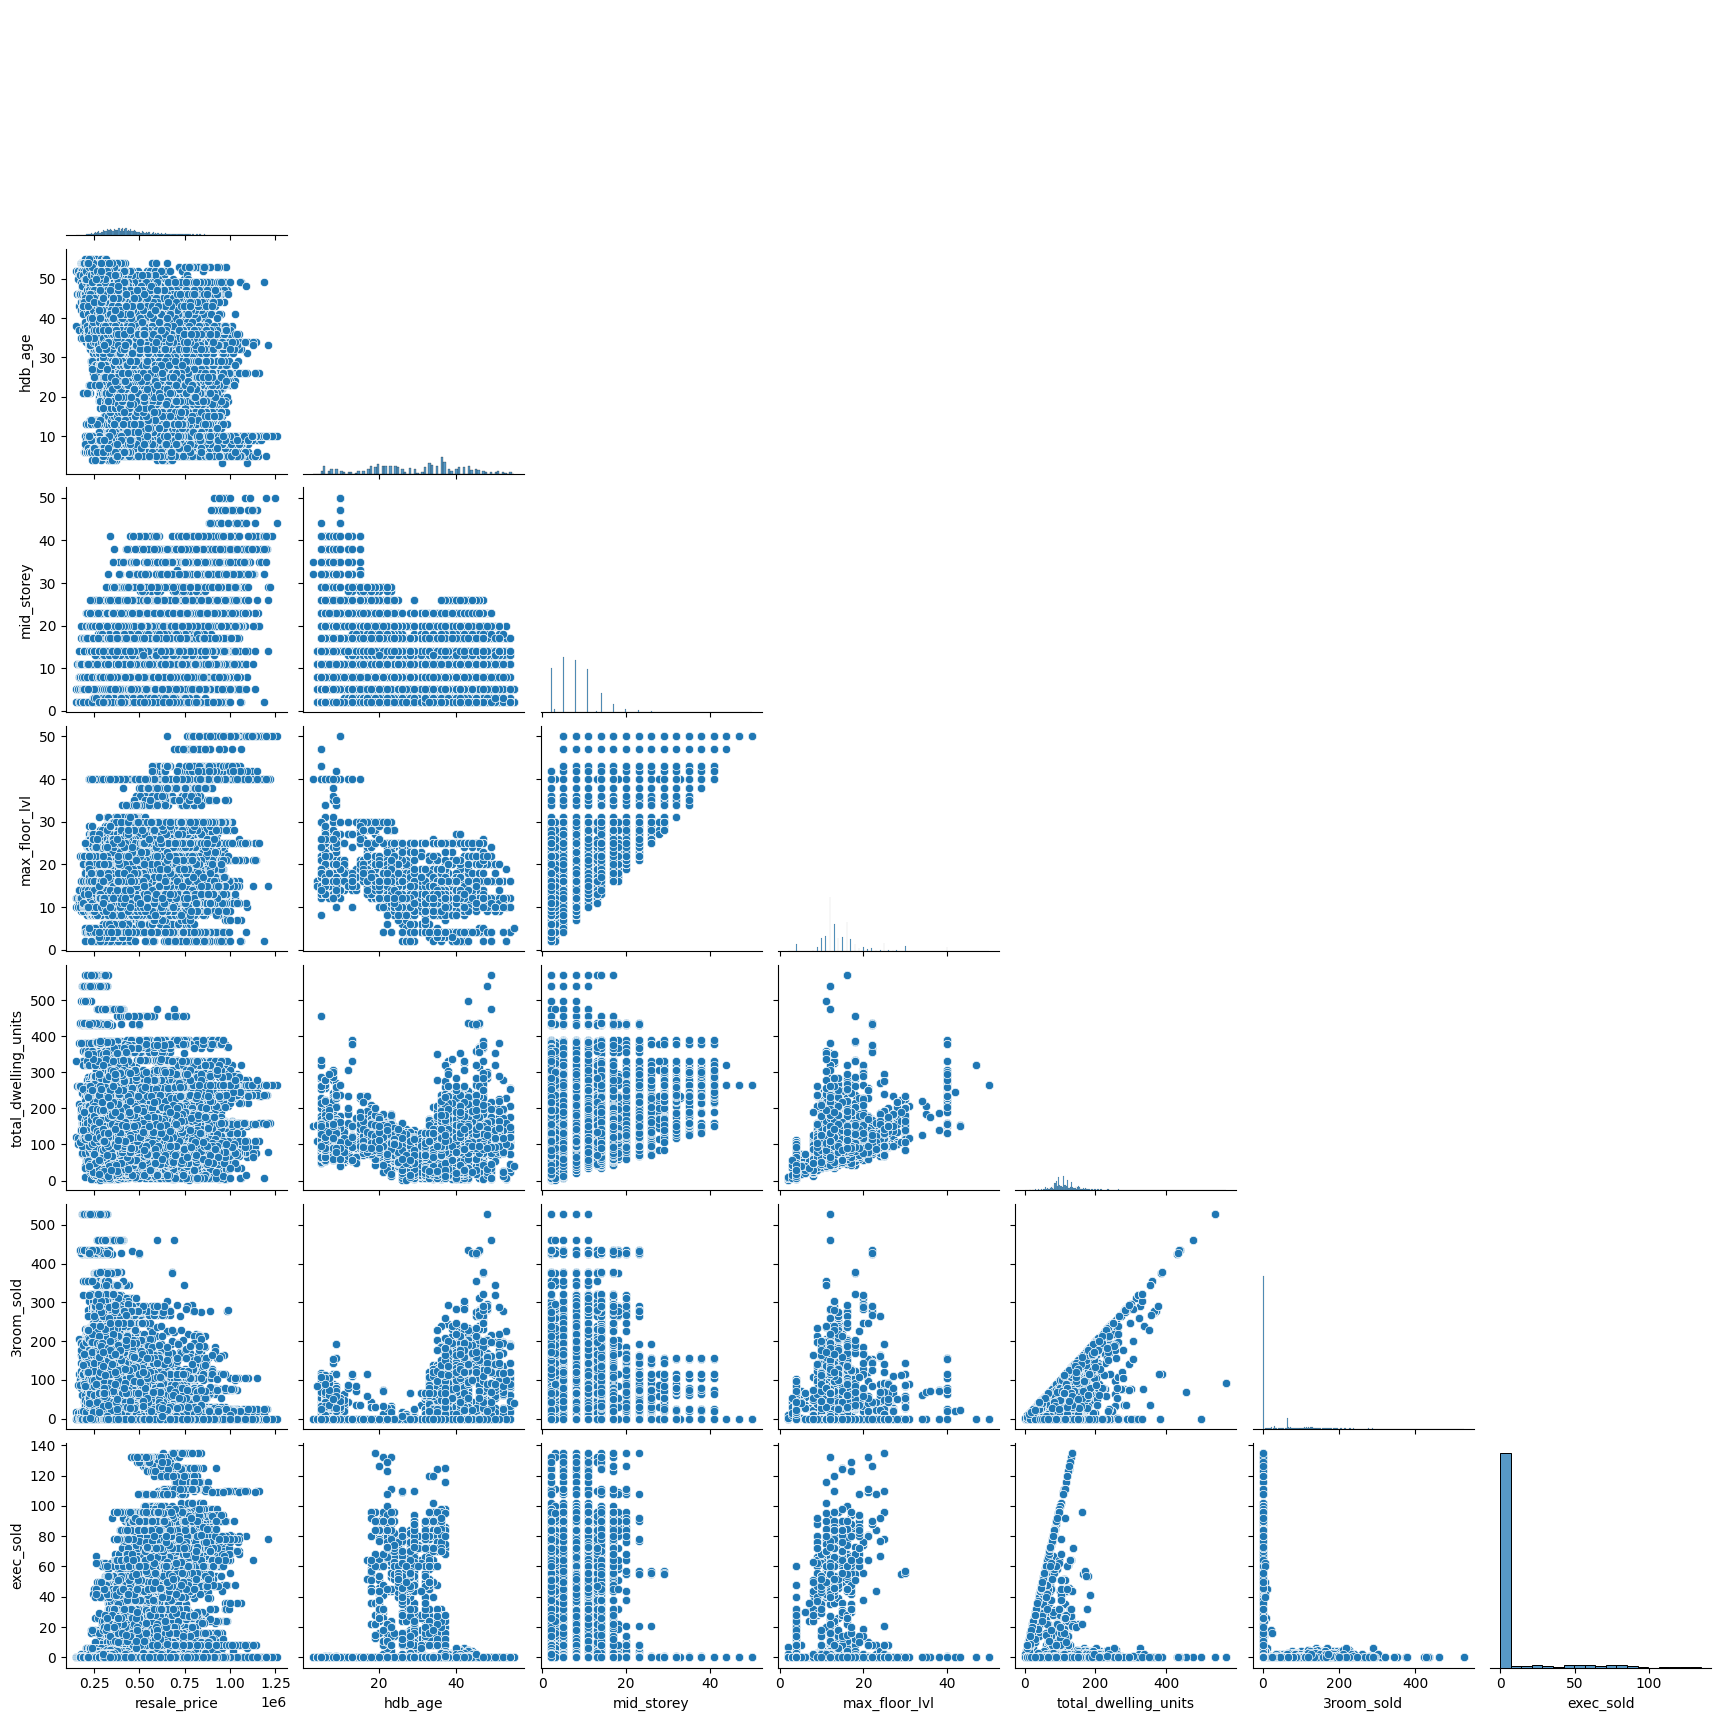

In [13]:
#pairplot to see the predictors having mild correlation (correlation value > 0.3) against re_sale_price
sns.pairplot(df,
             x_vars = ['resale_price','hdb_age','mid_storey','max_floor_lvl','total_dwelling_units','3room_sold','exec_sold'], 
             y_vars = ['resale_price','hdb_age','mid_storey','max_floor_lvl','total_dwelling_units','3room_sold','exec_sold'],
             corner = True)
plt.show()

Pair plot for predictors having mild correlation (correlation value > 0.3) against re_sale_price. 
> Observation: Positive correlation is observed between Resale Price and Mid_Storey, Max_Floor_Lvl, and Exec_Sold, while a negative correlation with HDB Age. This is inline with general expectation of resale price of a HDB flat. 

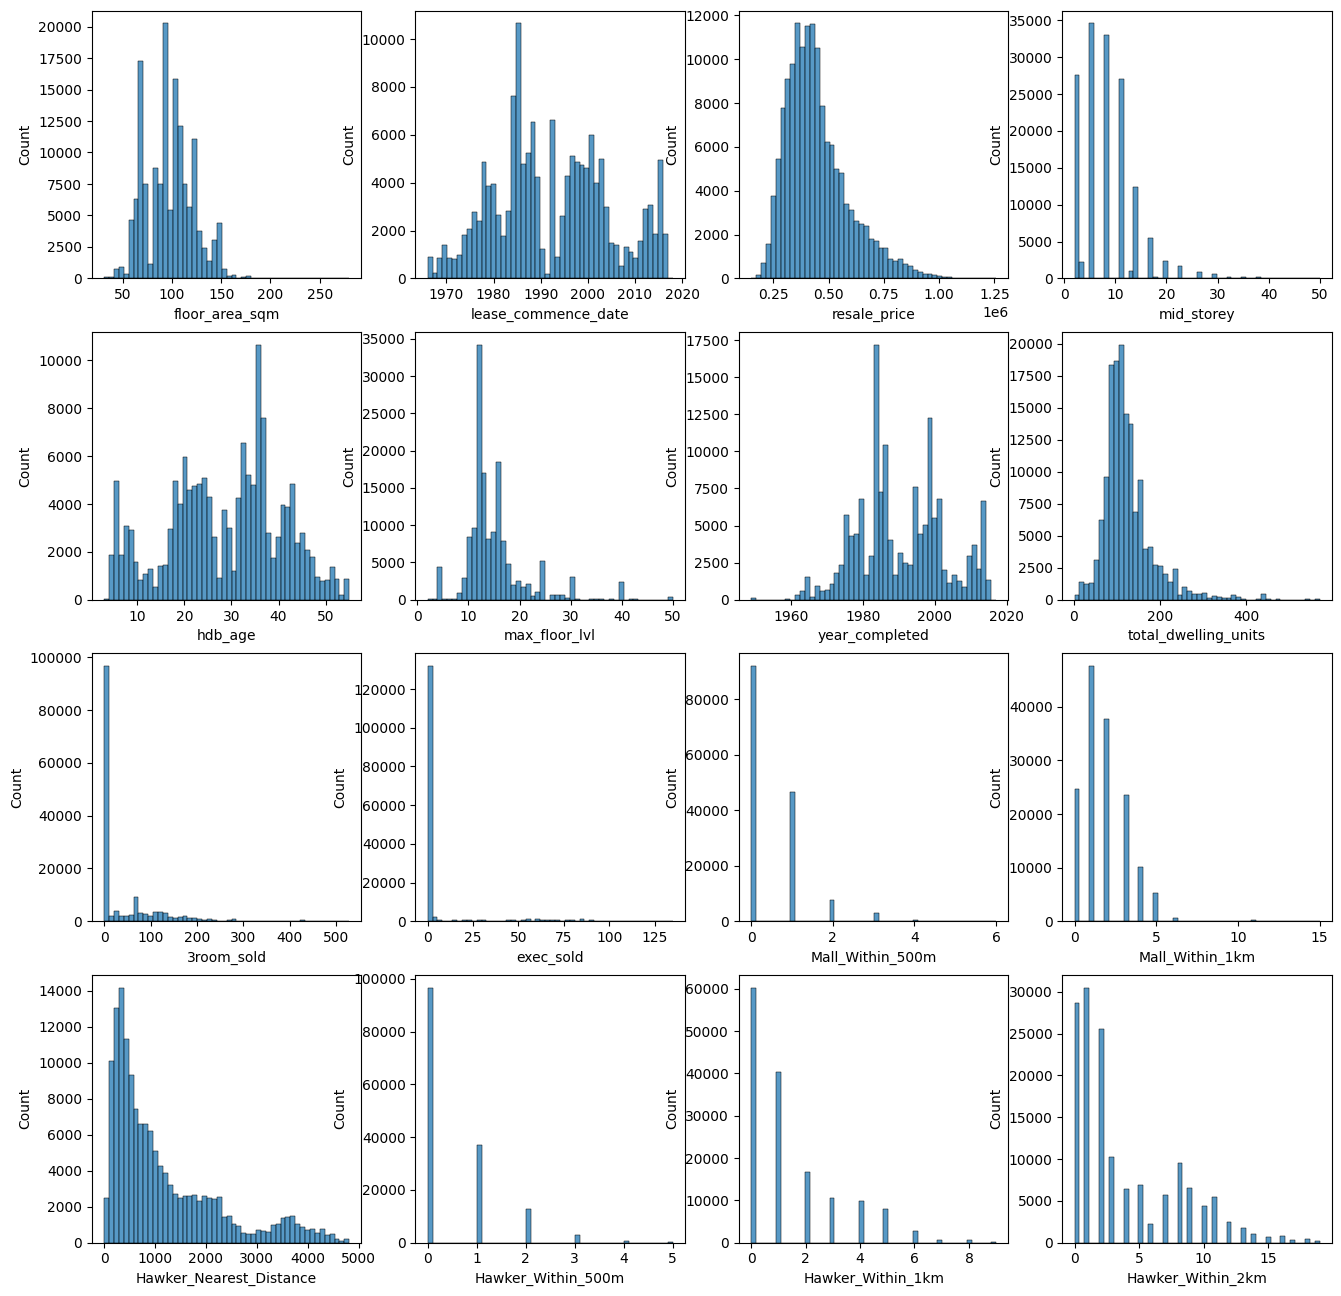

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize=(16,16))

for i, column in enumerate(high_corr_columns):
    ax = axes[i//4, i%4]
    sns.histplot(data=df_num, x = high_corr_columns[i], bins=50, ax= ax)

Histogram showing the distribution of the features with high correlation matrix score. All showing normal distribution, with distance related features having relative right skewness due to the the attractiveness of HDB resale unit with proximity to facilities.

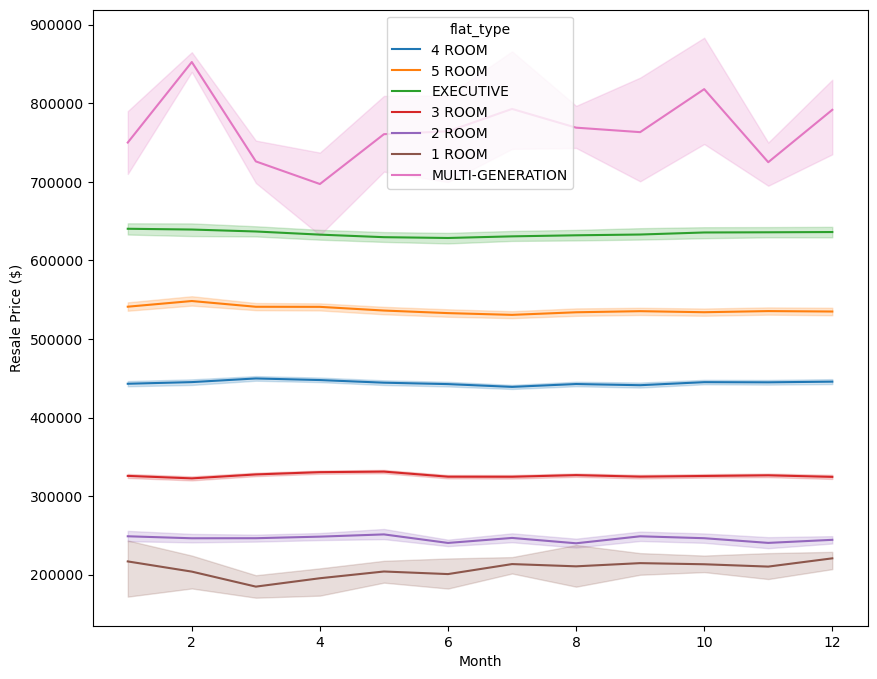

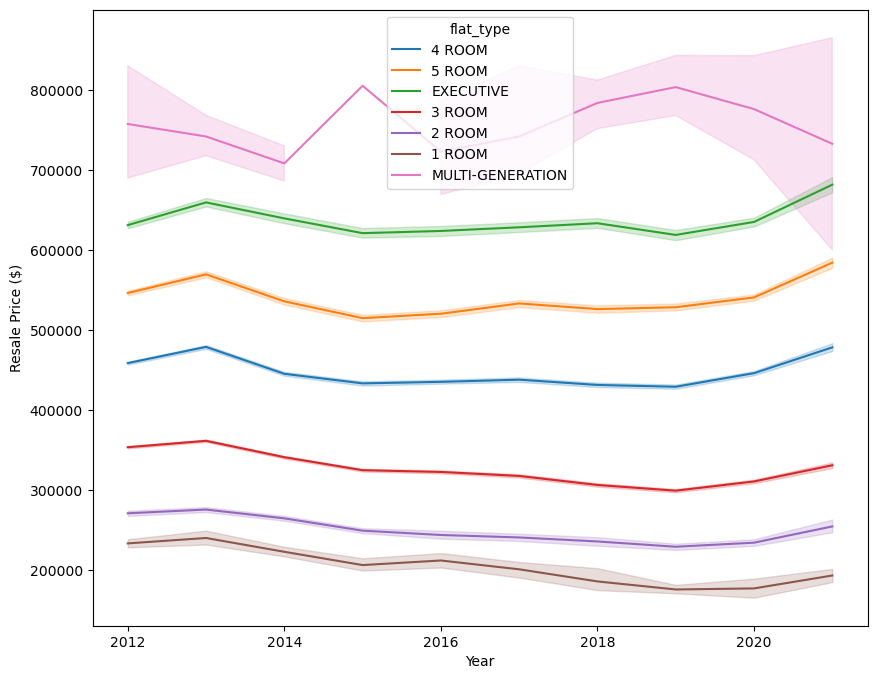

In [57]:
## line plot to check the average resale price, by the different flat type 

#fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(16,5))

fig, ax = plt.subplots(figsize=(10,8)) 
sns.lineplot(data=df, x='Tranc_Month', y='resale_price', hue='flat_type')
ax.set(xlabel='Month', ylabel = 'Resale Price ($)')
#ax.set_title(column)
plt.show()

fig, ax = plt.subplots(figsize=(10,8)) 
#ax = axes[1]
sns.lineplot(data=df, x='Tranc_Year', y='resale_price', hue = 'flat_type')
ax.set(xlabel='Year', ylabel = 'Resale Price ($)')

plt.show()

line plot to check the average resale price, by the different flat type, across the years, as well as across 12 months in a year. 

> Observation: Over the 12 months, the resale price is almost stable without any fluctiation, except MULTI-GENERATION wihch could be caused by the low transaction volumne for this flat type 

> Observation: Over the years between 2012 and 2021, there was down trend observed in 2013 to 2015, largely impacted by property cooling measure rolled out the government. The price remains stable until 2019 where price increment was observed across the flat type except MULTI-GENERATION, which could be caused by the low transaction volume for this flat type. 

---
# Output the cleaned dataframe to CSV

In [ ]:
# cleaned dataframe is output to CSV 
to_csv_filename = f'../data/train_01_Cleaned.csv'
df_dropped.to_csv(to_csv_filename, index = False)